In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from datetime import datetime
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
from nltk.corpus import wordnet
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import re
import numpy as np
from bs4 import BeautifulSoup
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation


In [8]:
content_filtered=pd.read_csv('content_filtered.csv', encoding='latin1', index_col=0)

In [9]:
content_filtered

comment_id                                          self_text  \
0         lfqhets  Have you ever read Hamas mission statement fro...   
1         lfqhbzr  You canÃÂ¢ÃÂÃÂt achieve zero casualties. ...   
2         lfqhb8g  You believe helping terrorists will serve your...   
3         lfqh7c9  They'll commit the worst genocide ever, then t...   
4         lfqh6tr  25,000 is a long shot. It took about 3000 Hama...   
...           ...                                                ...   
709935    jz9k1yo  He is trying to stay calm for his daughter. Ã...   
709936    jz9jfca  That wasn't a robbery. they didn't take anythi...   
709937    jz9j8xh  Robbery that was a hit. That guy had planned o...   
709938    jz9j3lj  After this do they go home to their wife and k...   
709939    jz9i82j  Fuck being politically correct. Anyone who sho...   

               created_time  score         subreddit  \
0       2024-07-31 00:00:00      1   IsraelPalestine   
1       2024-07-30 23:59:31     -1   IsraelPalestine   
2       2024-07-30 23:59:23      6   IsraelPalestine   
3       2024-07-30 23:58:42      1   IsraelPalestine   
4       2024-07-30 23:58:37      1   IsraelPalestine   
...                     ...    ...               ...   
709935  2023-09-05 17:56:26   2614  TerrifyingAsFuck   
709936  2023-09-05 17:52:37    297  TerrifyingAsFuck   
709937  2023-09-05 17:51:31     47  TerrifyingAsFuck   
709938  2023-09-05 17:50:37   1774  TerrifyingAsFuck   
709939  2023-09-05 17:45:11   1618  TerrifyingAsFuck   

                                               clean_text  Compound  Positive  \
0       ever read hamas mission statement 1988 recentl...   -0.6705     0.158   
1       achieve zero casualty honest say side care kil...   -0.6486     0.244   
2                   believe help terrorist serve interest    0.0000     0.460   
3       commit bad genocide ever terrorist run country...   -0.8779     0.077   
4       long shot take 3000 hamas militant kill less h...   -0.9925     0.107   
...                                                   ...       ...       ...   
709935                             try stay calm daughter    0.3182     0.434   
709936               robbery take anything sound like hit    0.3612     0.333   
709937        robbery hit guy plan kill even move towards   -0.6908     0.000   
709938  go home wife kid act normal like traumatized c...   -0.0516     0.176   
709939  fuck politically correct anyone shoot anyone f...   -0.9531     0.000   

        Negative  Neutral  Category  
0          0.232    0.611  Negative  
1          0.332    0.424  Negative  
2          0.379    0.161   Neutral  
3          0.396    0.526  Negative  
4          0.255    0.638  Negative  
...          ...      ...       ...  
709935     0.000    0.566   Neutral  
709936     0.000    0.667   Neutral  
709937     0.402    0.598  Negative  
709938     0.190    0.634   Neutral  
709939     0.711    0.289  Negative  

[709913 rows x 11 columns]

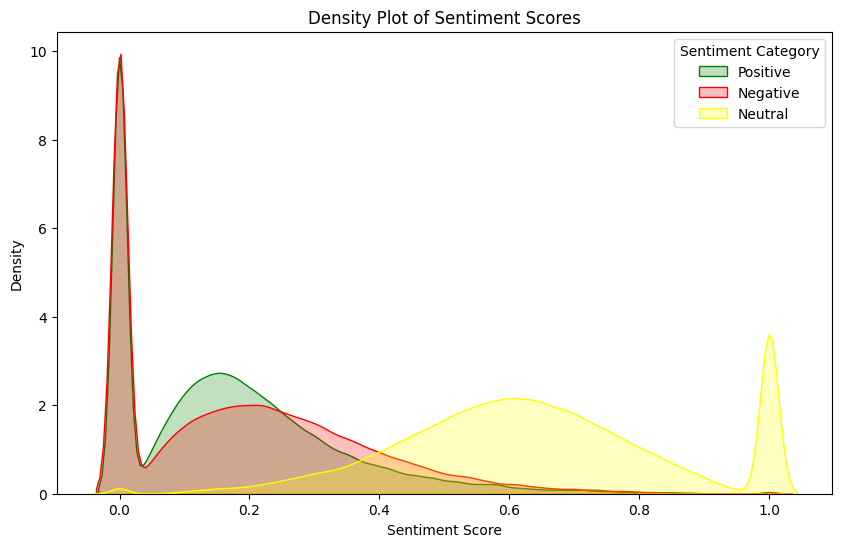

In [10]:
sentiment_categories = ["Positive", "Negative", "Neutral"]
colors = ['green', 'red', 'yellow']
plt.figure(figsize=(10, 6))
for category, color in zip(sentiment_categories, colors):
    sns.kdeplot(content_filtered[category], color=color, label=category, fill=True)
plt.xlabel('Sentiment Score')
plt.ylabel('Density')
plt.title('Density Plot of Sentiment Scores')
plt.legend(title='Sentiment Category')
plt.show()

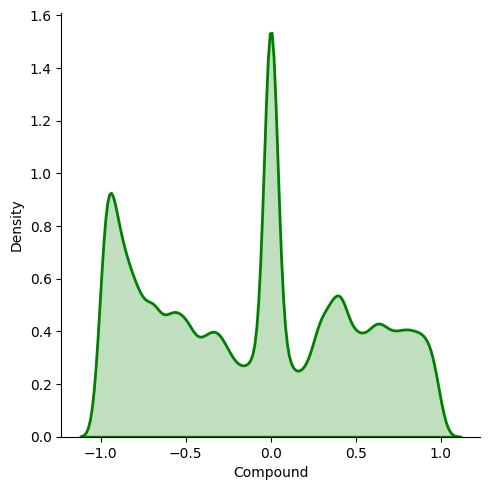

In [11]:
sns.displot(data=content_filtered, x="Compound", kind="kde", fill=True, color='green', linewidth=2)

In [12]:
text = " ".join(str(comment) for comment in content_filtered['clean_text'])

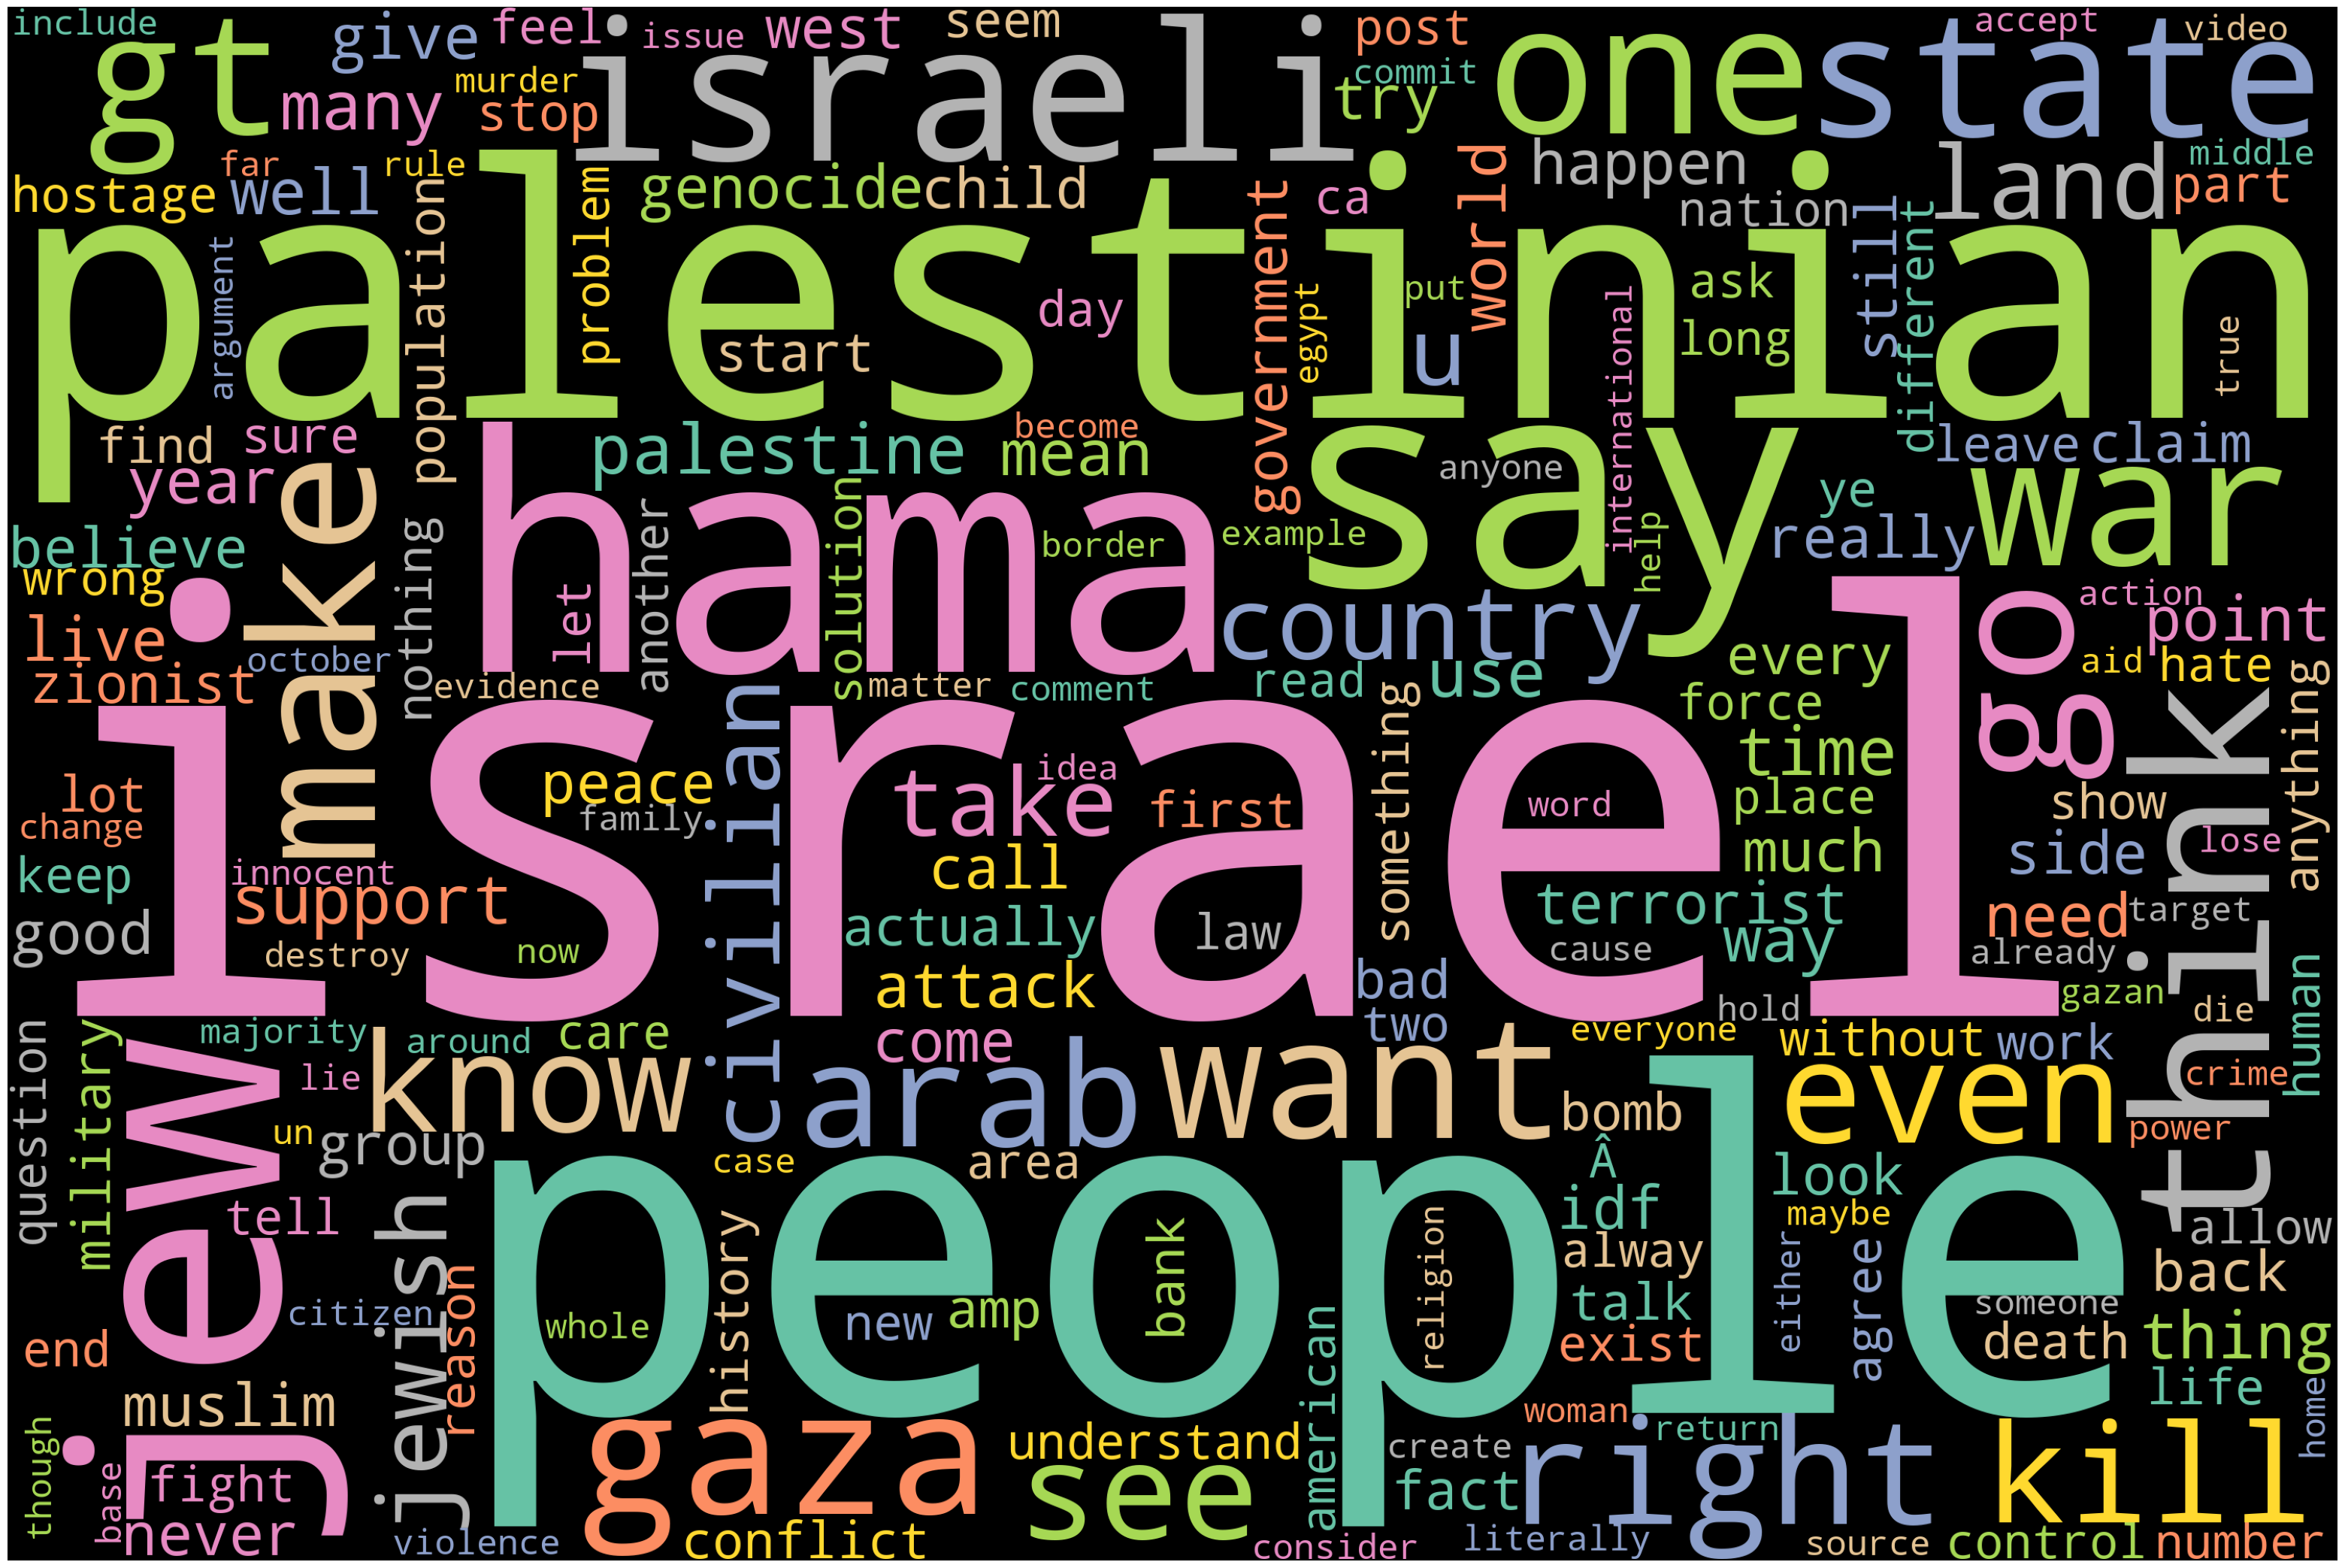

In [13]:
wordcloud = WordCloud(width=3000, height=2000, stopwords=STOPWORDS, background_color="black",colormap='Set2', collocations=False).generate_from_text(text)
plt.figure(figsize=(40, 30))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

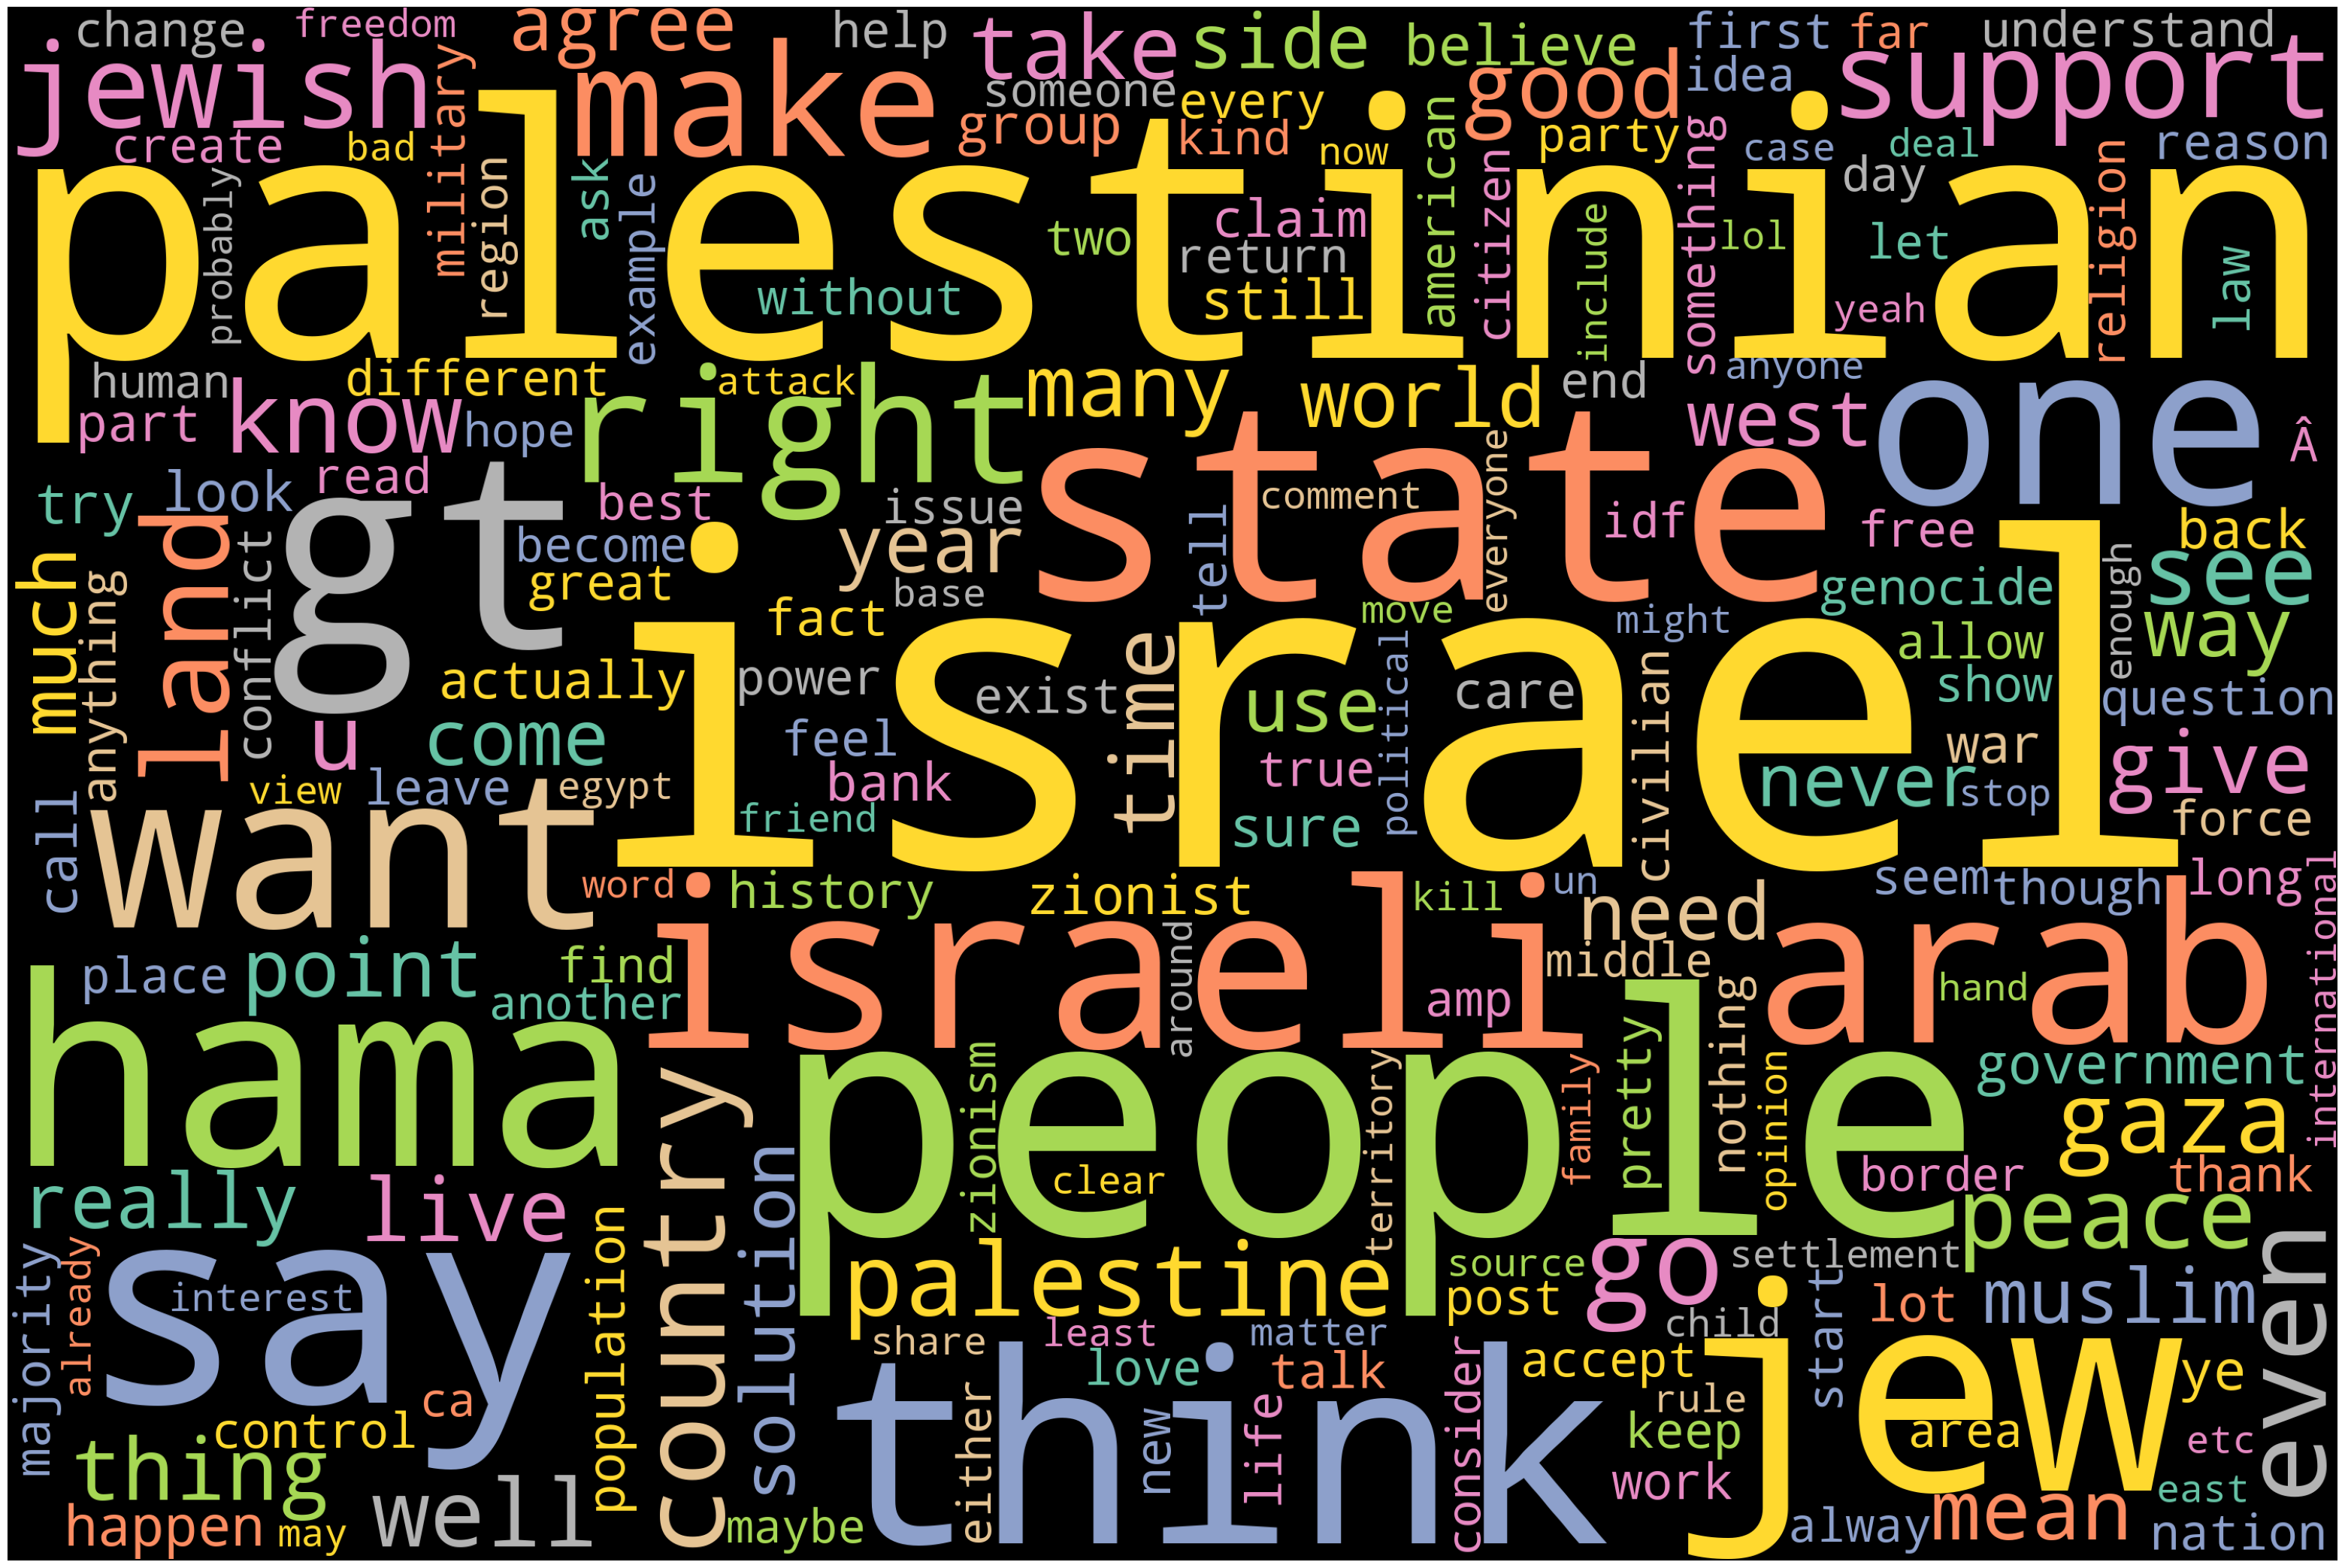

In [15]:
text = " ".join(str(comment) for comment in content_filtered[content_filtered['Category']=='Positive'].clean_text)
wordcloud = WordCloud(width=3000, height=2000, stopwords=STOPWORDS, background_color="black",
                      colormap='Set2', collocations=False).generate_from_text(text)
plt.figure(figsize=(40, 30))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

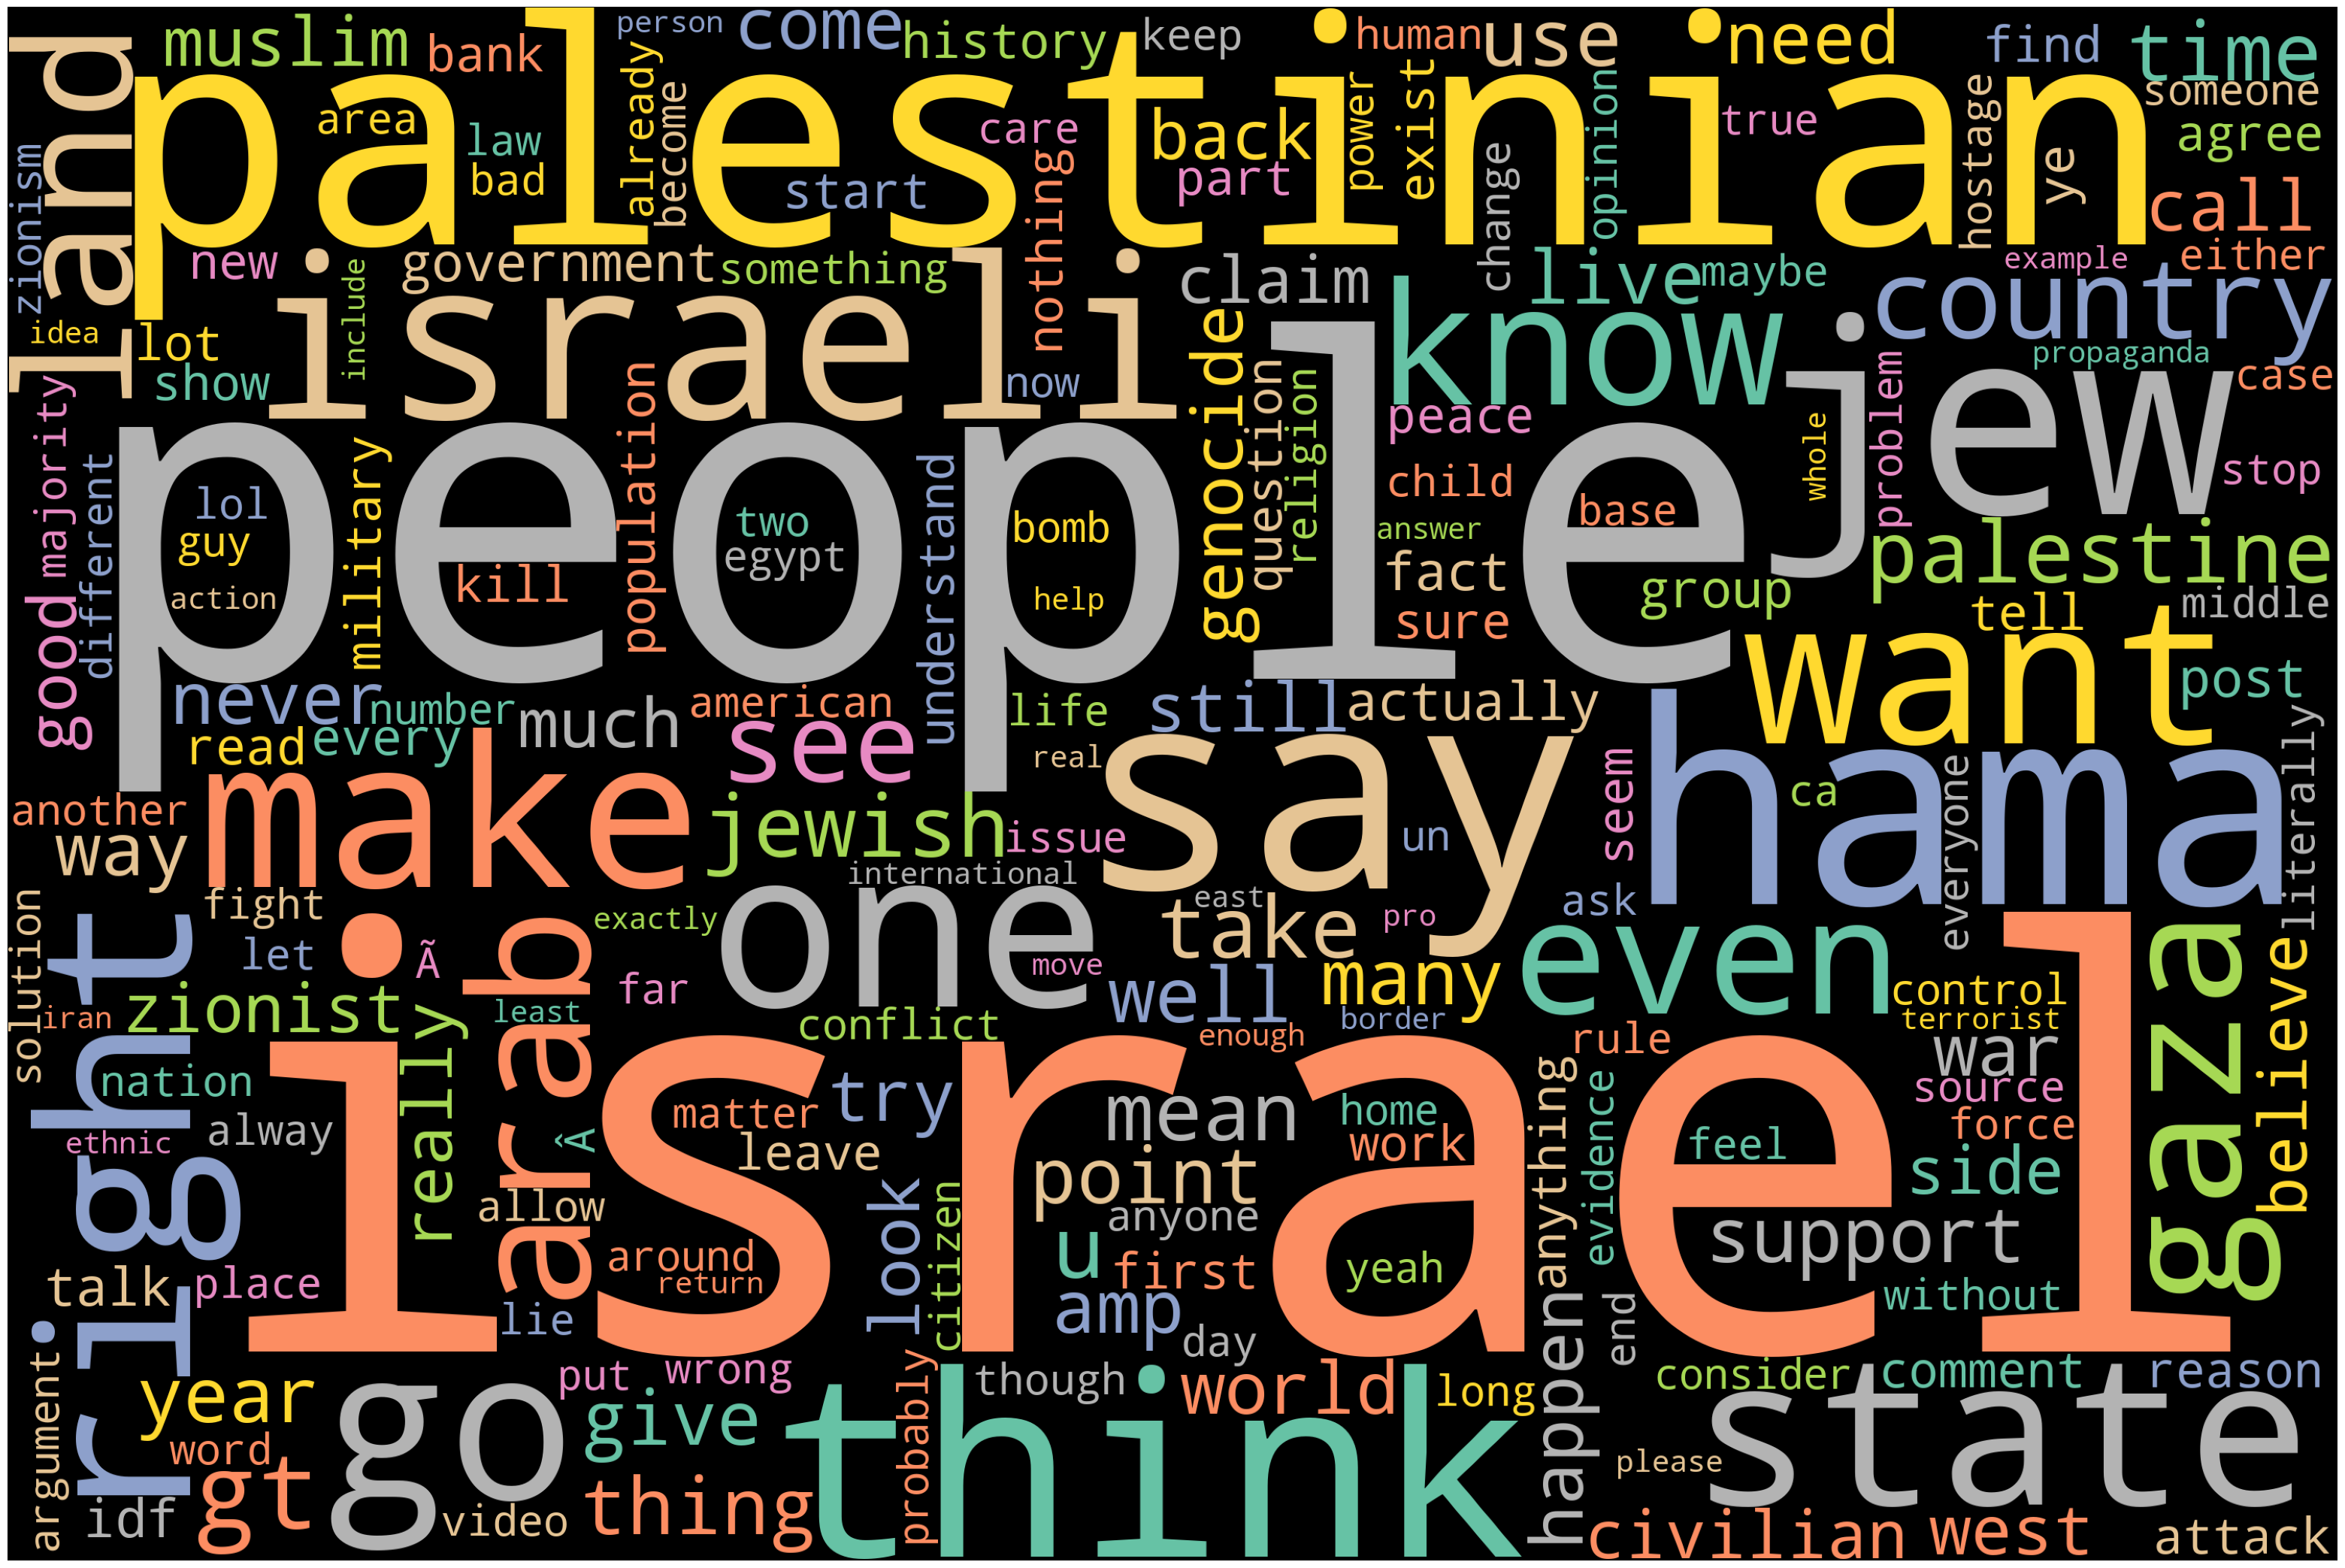

In [16]:
text = " ".join(str(comment) for comment in content_filtered[content_filtered['Category']=='Neutral'].clean_text)
wordcloud = WordCloud(width=3000, height=2000, stopwords=STOPWORDS, background_color="black",
                      colormap='Set2', collocations=False).generate_from_text(text)
plt.figure(figsize=(40, 30))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

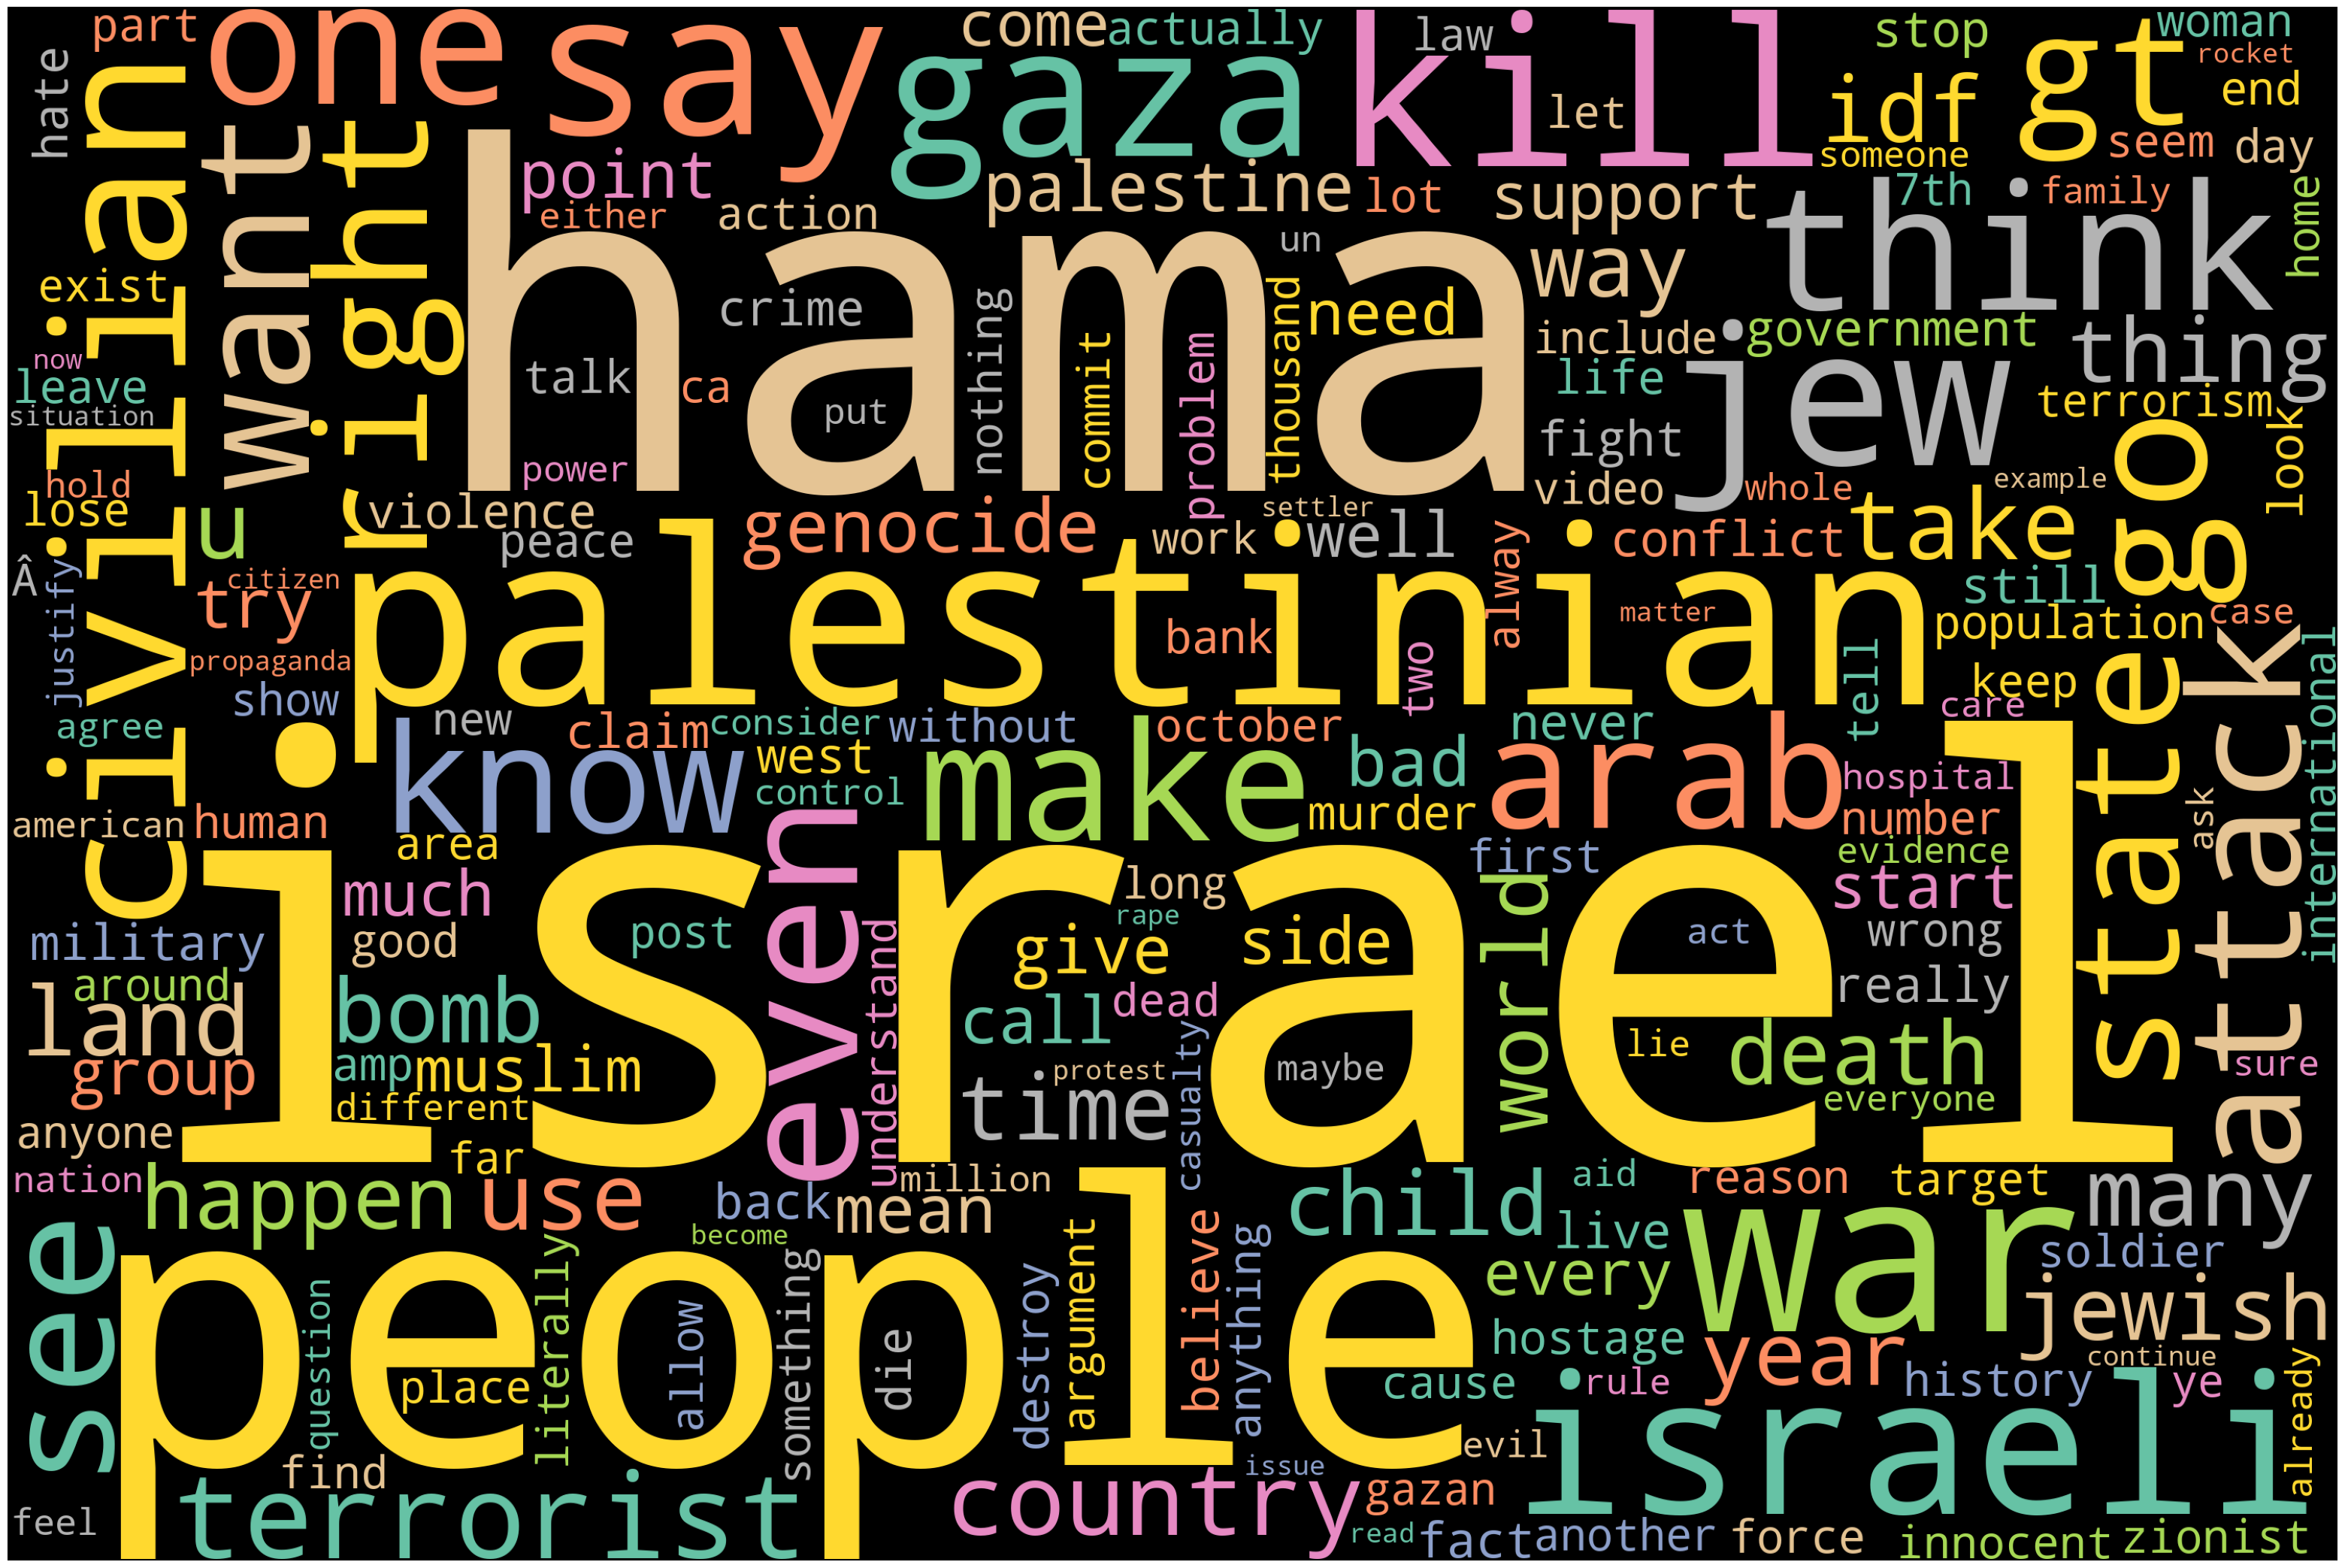

In [17]:
text = " ".join(str(comment) for comment in content_filtered[content_filtered['Category']=='Negative'].clean_text)
wordcloud = WordCloud(width=3000, height=2000, stopwords=STOPWORDS, background_color="black",
                      colormap='Set2', collocations=False).generate_from_text(text)
plt.figure(figsize=(40, 30))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [18]:
subreddit_sentiment =content_filtered.groupby('subreddit')[['Positive', 'Negative']].mean()
subreddit_sentiment['Bias'] = subreddit_sentiment['Positive'] - subreddit_sentiment['Negative']
def determine_bias_direction(bias):
    if bias > 0.01:  
        return 'Positive'
    elif bias < -0.01:  
        return 'Negative'
    else:
        return 'Neutral'
subreddit_sentiment['Bias Direction'] = subreddit_sentiment['Bias'].apply(determine_bias_direction)
most_biased_subreddits = subreddit_sentiment.sort_values(by='Bias', ascending=False)
print(most_biased_subreddits)

                       Positive  Negative      Bias Bias Direction
subreddit                                                         
AbruptChaos            0.172203  0.147173  0.025030       Positive
NonCredibleDefense     0.170759  0.146551  0.024209       Positive
AskMiddleEast          0.173751  0.169630  0.004121        Neutral
Palestine              0.181765  0.180316  0.001449        Neutral
CrazyFuckingVideos     0.176668  0.179356 -0.002688        Neutral
PublicFreakout         0.172673  0.185202 -0.012529       Negative
worldnews              0.163737  0.180734 -0.016996       Negative
IsraelPalestine        0.169012  0.191911 -0.022899       Negative
CombatFootage          0.162513  0.188551 -0.026038       Negative
TerrifyingAsFuck       0.168962  0.195215 -0.026253       Negative
ActualPublicFreakouts  0.169604  0.205058 -0.035454       Negative
worldnewsvideo         0.168123  0.207421 -0.039298       Negative
NoahGetTheBoat         0.178213  0.218732 -0.040518       Nega

In [22]:
content_filtered['clean_text'] = content_filtered['clean_text'].fillna('')
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
tfidf_matrix = vectorizer.fit_transform(content_filtered['clean_text'])
lda_model = LatentDirichletAllocation(n_components=5, random_state=42, n_jobs=-1) 
lda_topic_matrix = lda_model.fit_transform(tfidf_matrix)


In [23]:
feature_names = vectorizer.get_feature_names_out()
n_top_words = 10 
top_words_per_topic = []
for topic_idx, topic in enumerate(lda_model.components_):
    top_words_idx = topic.argsort()[:-n_top_words - 1:-1]
    top_words = [feature_names[i] for i in top_words_idx]
    top_words_per_topic.append(top_words)
for topic_idx, top_words in enumerate(top_words_per_topic):
    print(f"Topic #{topic_idx + 1}:")
    print(", ".join(top_words))
    print()

Topic #1:
israel, palestinian, hamas, gaza, state, war, israeli, want, peace, west

Topic #2:
jew, arab, people, jewish, land, muslim, israel, palestinian, country, right

Topic #3:
hamas, civilian, kill, http, israel, idf, child, people, amp, bomb

Topic #4:
like, israel, fuck, think, country, na, american, people, iran, russia

Topic #5:
say, post, people, think, comment, know, like, make, read, http



In [24]:
israel_word_index = vectorizer.vocabulary_['israel']
palestine_word_index = vectorizer.vocabulary_['palestine']
topic_term_distribution = lda_model.components_
israel_topic_index = topic_term_distribution[:, israel_word_index].argmax()
palestine_topic_index = topic_term_distribution[:, palestine_word_index].argmax()

In [25]:
def determine_geopolitical_stance(row):
    sentiment_score = row['Compound']
    topic_distribution = lda_model.transform(vectorizer.transform([row['clean_text']]))[0]
    if sentiment_score <= -0.5:
        return 'Against Israel/Palestine'
    elif sentiment_score >= 0.5 and topic_distribution.argmax() == israel_topic_index:
        return 'Supports Israel'
    elif sentiment_score >= 0.5 and topic_distribution.argmax() == palestine_topic_index:
        return 'Supports Palestine'
    else:
        return 'Neutral/Stance Not Clear'
content_filtered['geopolitical_stance'] = content_filtered.apply(determine_geopolitical_stance, axis=1)

MemoryError: 